In [3]:
import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics

We use data in the file `zoo.csv` (from https://www.kaggle.com/uciml/zoo-animal-classification). The dataset consists of features of different animals at a zoo, and the animals are divided into 7 different types: 4-legged animals, fish, birds, crustaceans, amphibians, insects, reptiles.

In [4]:
# Reading data into a DataFrame, printing the size and first 5 lines of the DataFrame.
a = pd.read_csv("zoo.csv") 
print(a.shape)
a.head()


(101, 18)


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


2. Creating the X data, which is the DataFrame a but with no 'animal_name' or 'class_type' columns.


In [5]:
y = a.class_type 
X = a.drop(columns=['animal_name','class_type'])
print(y.shape)
print(X.shape)


(101,)
(101, 16)


3. Note that the data in x are conveniently numbers already. Otherwise we'd have to convert any text strings into numbers.
<br>Splitting the data into a training set and a test set.
<br>Showing the size of the sets.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(75, 16) (26, 16) (75,) (26,)


Creating a KNN classifer, train and test the classifier

In [7]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(75, 16) (26, 16) (75,) (26,)


In [8]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)
classifier = classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

 Checking the predictions

In [9]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df.shape)
df

(26, 2)


,Actual,Predicted
13,7,3
21,2,2
52,5,1
0,1,1
69,1,1
78,2,2
38,4,4
8,4,4
87,2,2
44,1,1


In [10]:
metrics.accuracy_score(y_test, y_pred)

0.7692307692307693

In [11]:
print(metrics.confusion_matrix(y_test, y_pred, labels=np.arange(1,8)))

[[7 0 0 0 0 0 0]
 [0 7 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 6 0 0 0]
 [1 0 2 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 2 0 0 1 0]]


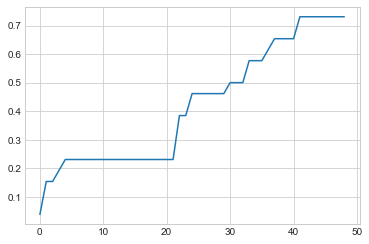

In [12]:
# we loop through K values from 1 to 50, using the same X and y datasets
errors = []
for i in np.arange(1, 50):
    c = KNeighborsClassifier(n_neighbors = i)
    c.fit(X_train, y_train)
    y_pred = c.predict(X_test)
    errors.append(np.mean(y_pred != y_test))
    
# see what the error rate looks like
plt.style.use('seaborn-whitegrid')
plt.plot(errors)